### Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación

### Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

# Práctico Análisis y Visualización

Integrantes:

### Objetivos:

* Generar un corpus con todos los documentos. 

* Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

* Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras? 

* Hacer lo mismo con n-gramas.

* Visualizar la frecuencia de palabras en una nube de palabras.

* Elaborar una breve conclusión de lo encontrado

Fecha de Entrega: 6 de junio de 2021

In [36]:
#!conda install -y -c anaconda spacy 

In [37]:
#!python -m spacy download es_core_news_sm

In [38]:
#!python -m spacy download es_core_news_md

In [39]:
#!conda install -y -c conda-forge wordcloud

In [40]:
#!conda install -y -c conda-forge textacy

In [41]:
#!conda install -y  -c anaconda nltk 

In [1]:
import spacy
from spacy.lang.es.examples import sentences
import glob
import os
import pandas as pd 
import shutil
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import textacy
import re
import nltk
from nltk.util import ngrams
import numpy as np

# Generar un corpus con todos los documentos

In [2]:

# Processor que reemplaza varios caracteres contra uno solo

class MapMultipleCharsToCharProcessor:
    
    def __init__(self, characters_to_replace, new_value = " " , to_lower = False):
        self.characters_to_replace = characters_to_replace
        self.new_value = new_value
        self.to_lower = to_lower
    
    def process(self, text):
        for ch in self.characters_to_replace:
            text = text.replace(ch,self.new_value)

        if self.to_lower:
            text = text.lower()
        return text

  
# Implementa un visitor. Se registran N procesors los cuales se ejecutan en el orden que fueron
# agregados.

class TextCleaner:
    
    def __init__(self):
        self.processors = []
    
    def registerProcessor(self, processor):
        self.processors.append(processor)
    
    
    def process(self, text):
        
        for processor in self.processors:
                text = processor.process(text)
    
        return text

    
# Tokeniza el string usando "tokenizer_symbol" 


def tokenize(text, tokenizer_symbol):
    result = text.split(tokenizer_symbol)
    
    return result




In [3]:
root_path = "Documentos"

directories = [x[0] for x in os.walk(root_path)]

directories.pop(0)

for directory in directories:
    print (directory)


Documentos/PENAL
Documentos/MENORES
Documentos/FAMILIA
Documentos/LABORAL


In [4]:
def generate_corpus_df(directories, text_cleaner):
    corpus = []

    for directory in directories:
      
        file_list = glob.glob(os.path.join(os.getcwd(), directory, "*.txt"))


        for file_path in file_list:
            with open(file_path) as f_input:
                corpus.append([text_cleaner.process(f_input.read()) , directory])

    return pd.DataFrame(corpus, columns=["text", "classifier"] )


In [5]:
characters_to_replace = [',', ':' , "\n" , "”"]
new_character = " "

mapMultipleCharsToChar = MapMultipleCharsToCharProcessor(characters_to_replace , new_character , True)
textCleaner = TextCleaner()
textCleaner.registerProcessor(mapMultipleCharsToChar)


corpus_df = generate_corpus_df(directories , textCleaner)
corpus_df

,text,classifier
0,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
1,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
2,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
3,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
4,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
...,...,...
238,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
239,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
240,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
241,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


In [6]:
corpus_df.to_csv("corpus.csv" ,index= False)

In [7]:
corpus_df = pd.read_csv("corpus.csv")
corpus_df

,text,classifier
0,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
1,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
2,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
3,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
4,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
...,...,...
238,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
239,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
240,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
241,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


In [8]:

#agrupando text de cada jurisdiccion en una lista.
def create_df_text_aggregated_by_jurisdiction(directories, corpus_df):

    aggregated_corpus =  []
    for directory in directories:
    
        text = corpus_df[corpus_df['classifier'] == directory ]['text'].tolist()
        text = " ".join(text)
        aggregated_corpus.append([text , directory])
        
    return pd.DataFrame(aggregated_corpus, columns=["text", "classifier"] )



In [9]:
aggregated_corups_df = create_df_text_aggregated_by_jurisdiction(directories, corpus_df)

In [10]:

len(aggregated_corups_df['text'][0])
aggregated_corups_df

,text,classifier
0,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
1,auto interlocutorio número dieciséis (16) cór...,Documentos/MENORES
2,auto n.º 135. córdoba nueve de noviembre de d...,Documentos/FAMILIA
3,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


In [11]:
aggregated_corups_df.to_csv("aggregated_corpus.csv", index= False)

In [12]:
aggregated_corups_df = pd.read_csv("aggregated_corpus.csv")
aggregated_corups_df

,text,classifier
0,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
1,auto interlocutorio número dieciséis (16) cór...,Documentos/MENORES
2,auto n.º 135. córdoba nueve de noviembre de d...,Documentos/FAMILIA
3,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


# Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

In [13]:
def get_words(text):
    words = tokenize(text, " ")
    words = [ word for word in words if not word.strip() == ""]
    #words = [ word for word in words ]
    return words


def get_words_occurrence(words):
    word_freq = Counter(words)
    return pd.DataFrame(word_freq.most_common(), columns=["word" , "count"])


In [14]:
tmp = "datos de la causa sede  ciudad de córdoba.  dependencia  juzgado de niñez  adolescencia de de"

get_words_occurrence(get_words(tmp))

,word,count
0,de,5
1,datos,1
2,la,1
3,causa,1
4,sede,1
5,ciudad,1
6,córdoba.,1
7,dependencia,1
8,juzgado,1
9,niñez,1


In [15]:
def get_word_ocurrence_df(classifier_name):
    text = aggregated_corups_df[aggregated_corups_df['classifier'] == classifier_name ]['text'].values[0]
    
    words = get_words(text)
    df = get_words_occurrence(words)
    return (df, words)

In [17]:
(df_common_words_menores,common_words_menores ) = get_word_ocurrence_df('Documentos/MENORES')
(df_common_words_penal, common_words_penal)  = get_word_ocurrence_df('Documentos/FAMILIA')
(df_common_words_familia, common_words_familia)= get_word_ocurrence_df('Documentos/LABORAL')
(df_common_words_laboral, common_words_laboral) = get_word_ocurrence_df('Documentos/PENAL')

In [18]:
merged = pd.merge(df_common_words_menores,df_common_words_penal, on='word' , how='outer')
colums_names = ['word' , 'menores_word_count', 'penal_word_count']


merged = pd.merge(merged,df_common_words_familia, on='word' , how='outer')
colums_names = ['word' , 'menores_word_count', 'penal_word_count' , 'famila_word_count']

merged = pd.merge(merged,df_common_words_laboral, on='word' , how='outer')
colums_names = ['word' , 'menores_word_count', 'penal_word_count' , 'famila_word_count', 'laboral_word_count']

merged.columns = colums_names

merged.replace(np.nan, 0 , inplace=True)

merged['total_word_count'] = merged['menores_word_count'] + merged['penal_word_count'] + merged['famila_word_count'] + merged['laboral_word_count']
df_common_word_total = merged
df_common_word_total

,word,menores_word_count,penal_word_count,famila_word_count,laboral_word_count,total_word_count
0,de,13706.0,39385.0,3695.0,25682.0,82468.0
1,la,9154.0,28037.0,3531.0,17447.0,58169.0
2,que,5376.0,20548.0,1827.0,13827.0,41578.0
3,y,5126.0,13237.0,1274.0,8135.0,27772.0
4,a,4826.0,12368.0,1599.0,8035.0,26828.0
...,...,...,...,...,...,...
52921,implicará,0.0,0.0,0.0,1.0,1.0
52922,9.728).,0.0,0.0,0.0,1.0,1.0
52923,763/12,0.0,0.0,0.0,1.0,1.0
52924,reglamentar,0.0,0.0,0.0,1.0,1.0


In [19]:
df_common_words_menores.shape

(15053, 2)

In [60]:
df_common_words_penal.shape

(26564, 2)

In [61]:
df_common_words_familia.shape

(7475, 2)

In [62]:
df_common_words_laboral.shape

(29961, 2)

In [63]:
df_common_word_total.shape

(52926, 6)

In [22]:
def plot_word_frequency(axes, x, y, df, title, limit_to_plot):
    
    seaborn.barplot(ax = axes , x=x, y=y, data=df.sort_values(y ,ascending=False)[0:limit_to_plot])
    axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
    axes.set_xlabel('Palabras')
    axes.set_ylabel('Ocurrencias')
    axes.set_title(title)

def plot_word_cloud(axes, df, limit_words, title, columns):
    
    tuples = [tuple(x) for x in df[columns].values]
    wordcloud = WordCloud(background_color="white" , max_words=limit_words).generate_from_frequencies(dict(tuples))

    axes.imshow(wordcloud, interpolation='bilinear')
    axes.axis('off')
    axes.set_title(title)
    

### Histograma de frecuencias de palabras por Corpus completo y por Fuero

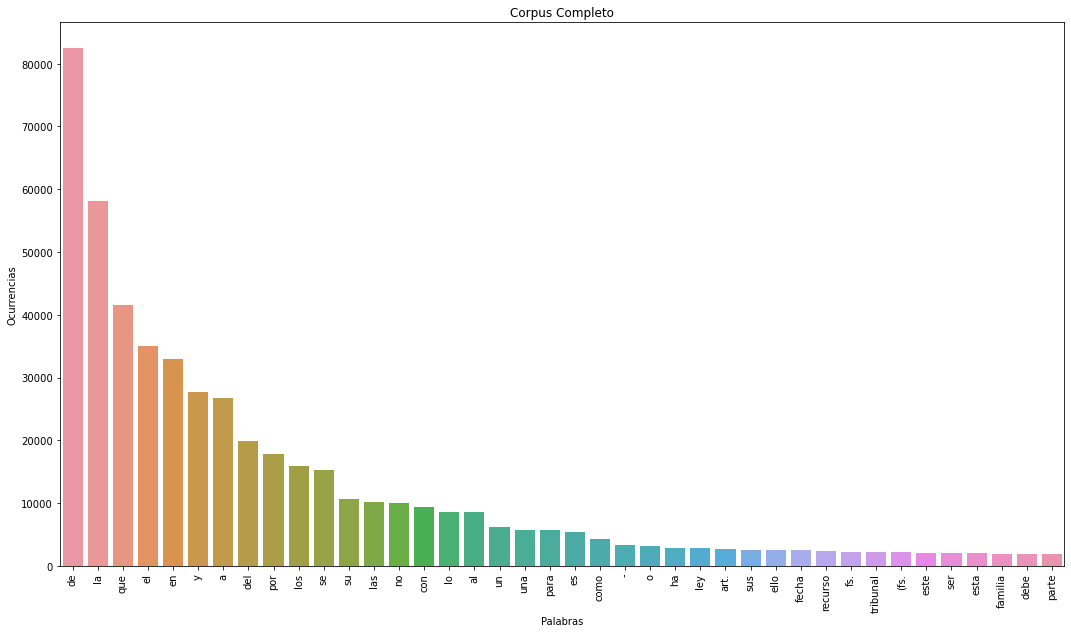

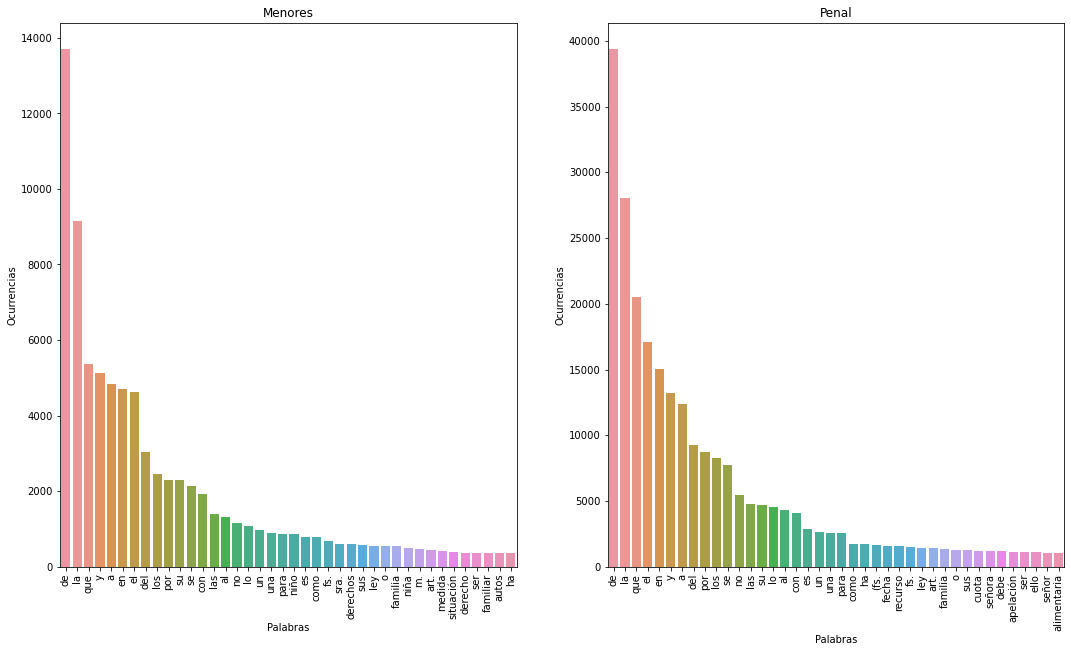

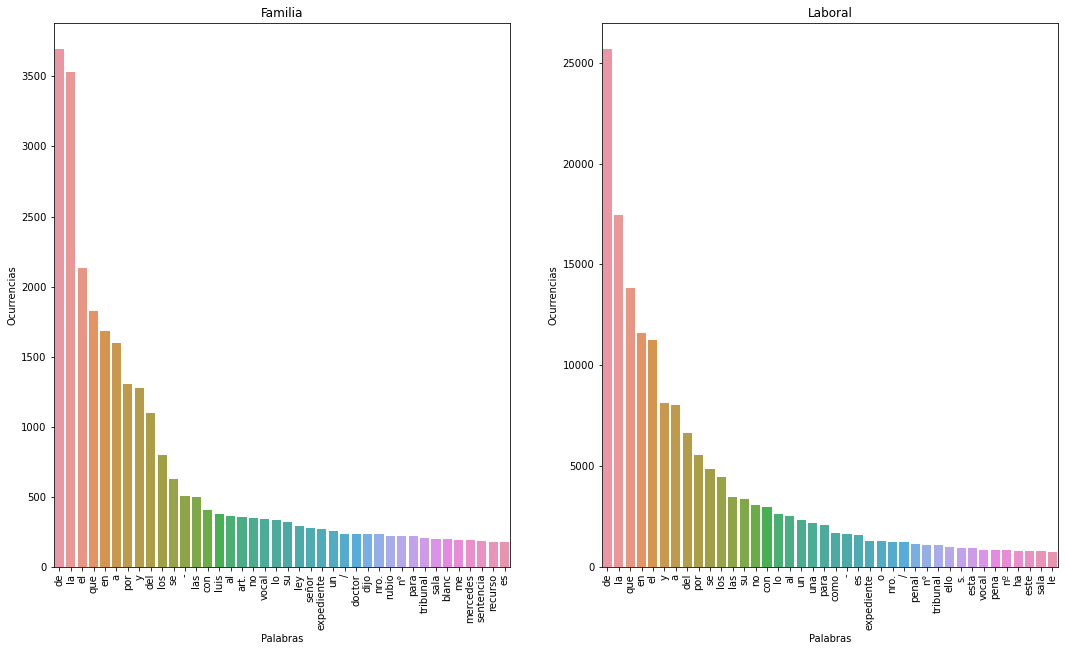

In [23]:
limit_to_plot=40

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

plot_word_frequency (axes = axes, x = "word" , y = "total_word_count", df = df_common_word_total ,title ="Corpus Completo" , limit_to_plot = limit_to_plot )


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_common_words_menores ,title ="Menores" , limit_to_plot = limit_to_plot )
plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_common_words_penal ,title ="Penal" , limit_to_plot = limit_to_plot )


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_common_words_familia ,title ="Familia" , limit_to_plot = limit_to_plot )
plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_common_words_laboral ,title ="Laboral" , limit_to_plot = limit_to_plot )

# Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras?

In [25]:
def get_word_occurrence_selected_df(classifier_name, aggregated_corpus):
    text = aggregated_corpus[aggregated_corpus['classifier'] == classifier_name]['text'].values[0]
    
    words = get_words(text)
    df = get_words_occurrence(words)
    return (df, words)

In [36]:
# Selecting 5 random documents from each jurisdiction
penal_selected = corpus_df[corpus_df['classifier'].str.contains('PENAL')].sample(5)
menores_selected = corpus_df[corpus_df['classifier'].str.contains('MENORES')].sample(5)
laboral_selected = corpus_df[corpus_df['classifier'].str.contains('LABORAL')].sample(5)
familia_selected = corpus_df[corpus_df['classifier'].str.contains('FAMILIA')].sample(5)

# Merging 
final_selected = menores_selected.append(penal_selected).append(laboral_selected).append(familia_selected)

# Getting the words from all the documents to a single row
aggregated_selected_df = create_df_text_aggregated_by_jurisdiction(directories, final_selected)
(df_penal_selected_words, penal_selected_words) = get_word_occurrence_selected_df('Documentos/PENAL', aggregated_selected_df)
(df_menores_selected_words, menores_selected_words) = get_word_occurrence_selected_df('Documentos/MENORES', aggregated_selected_df)
(df_laboral_selected_words, laboral_selected_words) = get_word_occurrence_selected_df('Documentos/LABORAL', aggregated_selected_df)
(df_familia_selected_words, familia_selected_words) = get_word_occurrence_selected_df('Documentos/FAMILIA', aggregated_selected_df)

print(df_penal_selected_words.shape)
print(df_menores_selected_words.shape)
print(df_laboral_selected_words.shape)
print(df_familia_selected_words.shape)

(5209, 2)
(6205, 2)
(2126, 2)
(4862, 2)


# Comparativa total Penal vs 5 documentos seleccionados aleatoriamente

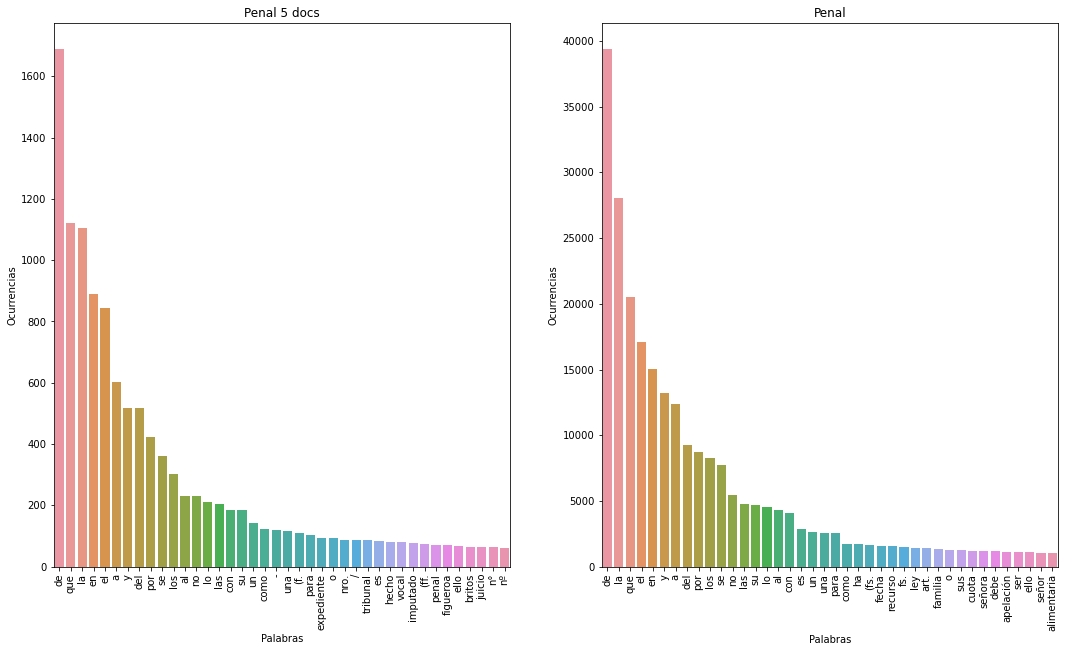

In [45]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency(axes = axes[0], x = "word", y = "count", df = df_penal_selected_words ,title ="Penal 5 docs", limit_to_plot = limit_to_plot)
plot_word_frequency(axes = axes[1], x = "word", y = "count", df = df_common_words_penal ,title ="Penal", limit_to_plot = limit_to_plot)

# Comparativa total Menores vs 5 documentos seleccionados aleatoriamente

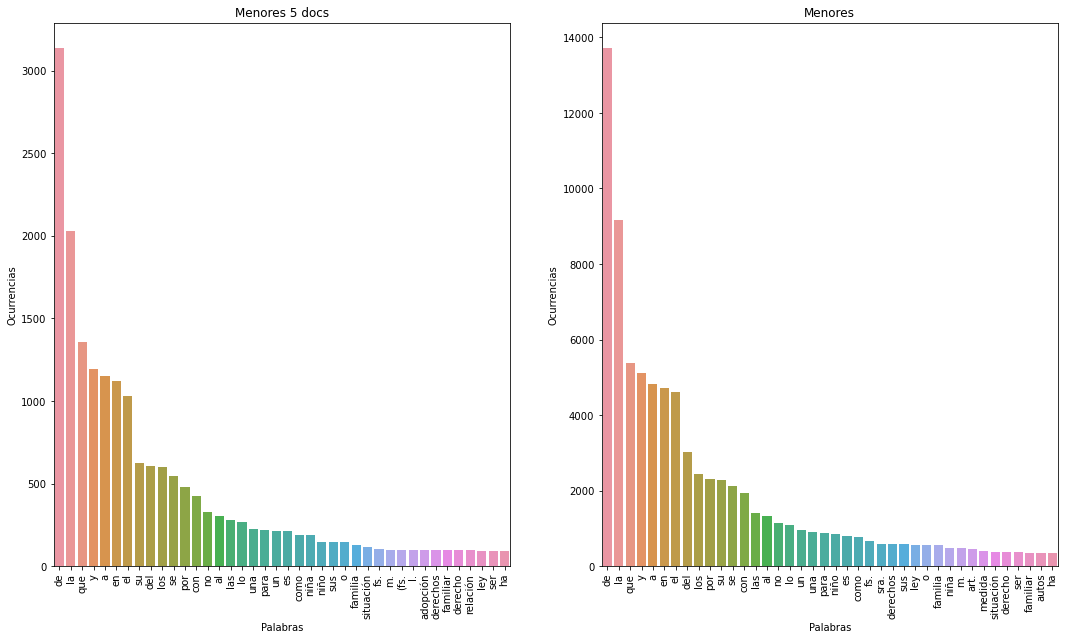

In [46]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency(axes = axes[0], x = "word", y = "count", df = df_menores_selected_words, title ="Menores 5 docs", limit_to_plot = limit_to_plot)
plot_word_frequency(axes = axes[1], x = "word", y = "count", df = df_common_words_menores, title ="Menores", limit_to_plot = limit_to_plot)

In [ ]:
# Comparativa total Laboral vs 5 documentos seleccionados aleatoriamente

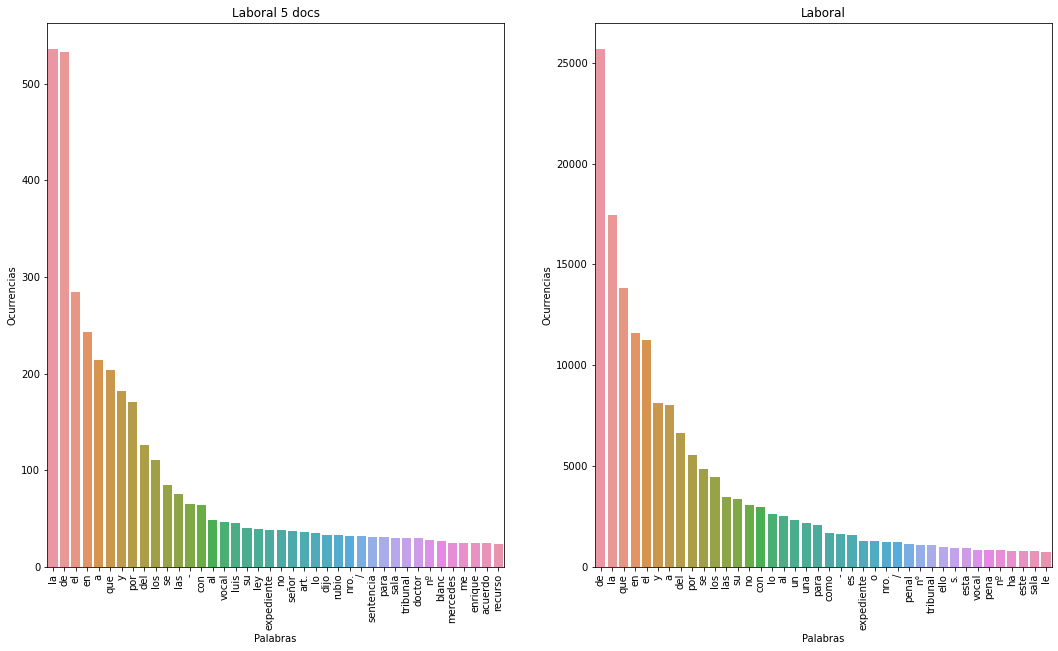

In [44]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency (axes = axes[0], x = "word", y = "count", df = df_laboral_selected_words ,title ="Laboral 5 docs", limit_to_plot = limit_to_plot)
plot_word_frequency (axes = axes[1], x = "word", y = "count", df = df_common_words_laboral ,title ="Laboral", limit_to_plot = limit_to_plot)

In [ ]:
# Comparativa total Familia vs 5 documentos seleccionados aleatoriamente

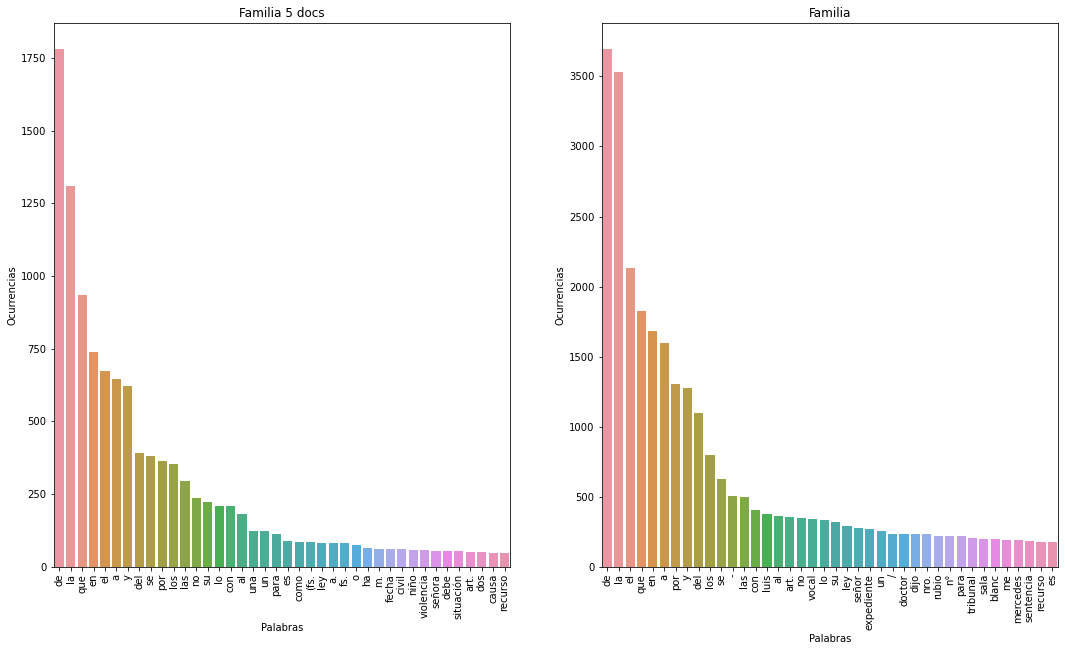

In [43]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency (axes = axes[0], x = "word", y = "count", df = df_familia_selected_words ,title ="Familia 5 docs", limit_to_plot = limit_to_plot)
plot_word_frequency (axes = axes[1], x = "word", y = "count", df = df_common_words_familia ,title ="Familia", limit_to_plot = limit_to_plot)

### Breve conclusion

Como se puede apreciar comparando los histogramas realizados arriba, la distribucion parece ser la misma tanto en el histograma que solo representa 5 documentos como en el que esta el total de los documentos. Las primeras palabras suelen tambien ser las mismas en ambos histogramas para cada jurisdicción aunque en algunos casos el orden se ve levemente alterado ("la" pasa de posicion 2 a posicion 3 por ej.)

# Hacer lo mismo con n-gramas.

In [ ]:
def get_anagrams(words, n): 
    result = ngrams(words, n)
    words = Counter(result)
    return words

def get_anagrams_count_df(words, n_gram_count):

    words = get_anagrams(words,n_gram_count )
    df = get_words_ocrruence(words)
    return df

### Distribucion de frecuencias n-gramas (bi-gramas en este caso)

In [ ]:
n_gram_count = 2

df_menores_anagrams_count = get_anagrams_count_df(common_words_menores,n_gram_count )
df_penal_anagrams_count = get_anagrams_count_df(common_words_penal,n_gram_count )
df_familia_anagrams_count = get_anagrams_count_df(common_words_familia,n_gram_count )
df_laboral_anagrams_count = get_anagrams_count_df(common_words_laboral,n_gram_count )


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_menores_anagrams_count ,title ="Menores" , limit_to_plot = limit_to_plot )
plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_penal_anagrams_count ,title ="Penal" , limit_to_plot = limit_to_plot )

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_familia_anagrams_count ,title ="Familia" , limit_to_plot = limit_to_plot )
plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_laboral_anagrams_count ,title ="Laboral" , limit_to_plot = limit_to_plot )

In [ ]:
def get_df_word_cloud(df, column, column_order, limit_words):
   
    sorted_df = df.sort_values(column_order ,ascending=False)[0:limit_to_plot]
    sorted_df["word_"] = sorted_df.apply( lambda row:" ".join(row[column] ), axis=1)

    return sorted_df


### Visualizar la frecuencia de bi anagramas en una nube de palabras

In [ ]:
limit_words = 100


df_menores_anagrams_count_tmp = get_df_word_cloud(df = df_menores_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_penal_anagrams_count_tmp =  get_df_word_cloud(df = df_penal_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_familia_anagrams_count_tmp =  get_df_word_cloud(df = df_familia_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_laboral_anagrams_count_tmp =  get_df_word_cloud(df = df_laboral_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))

plot_word_cloud(axes[0][0], df_menores_anagrams_count_tmp , limit_words, "Menores" , columns = ["word_","count"])
plot_word_cloud(axes[0][1], df_penal_anagrams_count_tmp , limit_words, "Penal" , columns = ["word_","count"])
plot_word_cloud(axes[1][0], df_familia_anagrams_count_tmp , limit_words, "Familia" , columns = ["word_","count"])
plot_word_cloud(axes[1][1], df_laboral_anagrams_count_tmp , limit_words, "Laboral" , columns = ["word_","count"])

# Visualizar la frecuencia de palabras en una nube de palabras.

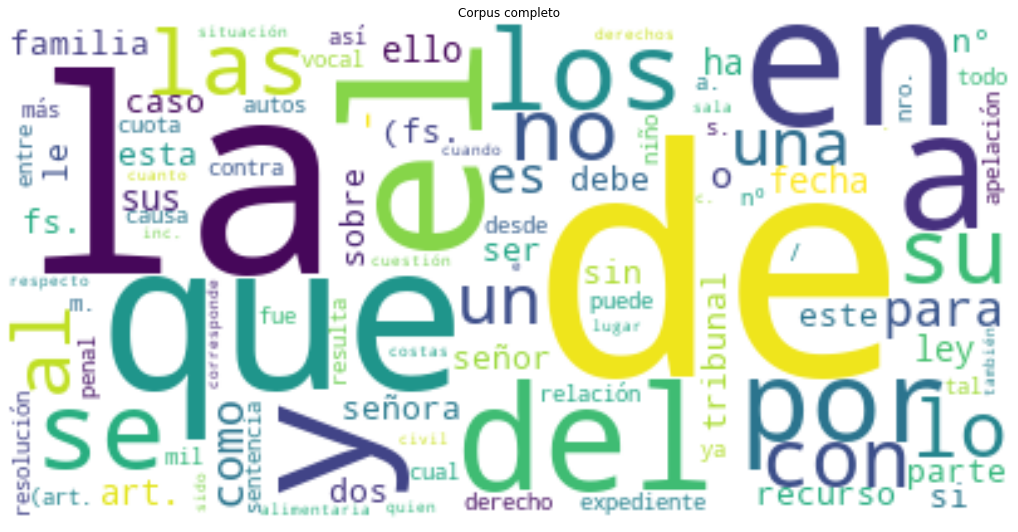

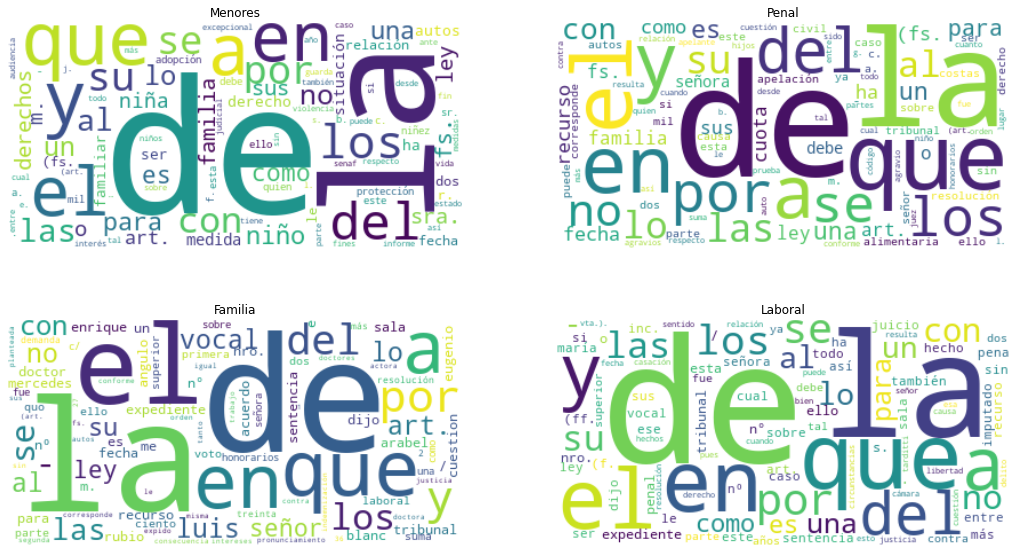

In [110]:
limit_words = 100

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

plot_word_cloud(axes, df_common_word_total , limit_words, "Corpus completo" , columns = ["word","total_word_count"])

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))

plot_word_cloud(axes[0][0], df_common_words_menores , limit_words, "Menores" , columns = ["word","count"])
plot_word_cloud(axes[0][1], df_common_words_penal , limit_words, "Penal" , columns = ["word","count"])
plot_word_cloud(axes[1][0], df_common_words_familia , limit_words, "Familia" , columns = ["word","count"])
plot_word_cloud(axes[1][1], df_common_words_laboral , limit_words, "Laboral" , columns = ["word","count"])